In [1]:
import pandas as pd

In [2]:
df_taxname = pd.read_csv('../viral_spectra/data/taxid_virus_type.csv', index_col='Unnamed: 0')
df_taxname['taxname'] = df_taxname['species'].str.split('__').str[0]

In [3]:
df_taxname

,taxid,species,host,gene,comment,Type,taxname
0,38170,Avian orthoreovirus__38170,NaN,NaN,NaN,ds,Avian orthoreovirus
1,1157337,Piscine orthoreovirus__1157337,NaN,NaN,NaN,ds,Piscine orthoreovirus
2,351073,Mammalian orthoreovirus__351073,NaN,NaN,NaN,ds,Mammalian orthoreovirus
3,40054,Epizootic hemorrhagic disease virus__40054,NaN,NaN,NaN,ds,Epizootic hemorrhagic disease virus
4,10990,Rice black streaked dwarf virus__10990,Avena sativa,P1 protein,NaN,ds,Rice black streaked dwarf virus
5,77763,Banna virus__77763,NaN,RNA-dependent RNA polymerase,NaN,ds,Banna virus
6,10407,Hepatitis B virus__10407,Homo sapiens,NaN,partially ds,ds,Hepatitis B virus
7,11320,Influenza A virus__11320,Homo sapiens,"Segment 1, polymerase PB2",<3000bp,-,Influenza A virus
8,162145,Human metapneumovirus__162145,Homo sapiens,large polymerase protein,NaN,-,Human metapneumovirus
9,12814,Respiratory syncytial virus__12814,Homo sapiens,polymerase subunit L,NaN,-,Respiratory syncytial virus


In [4]:
df_nemu_ms12 = pd.read_csv('../viral_spectra/data/ms12syn_all_virus.csv')

In [5]:
df_nemu_ms12

,Mut,ObsNum,ExpNum,MutSpec,MutSpec_q05,MutSpec_median,MutSpec_q95,taxid
0,A>C,222.10000,109.4550,0.109127,0.098138,0.109519,0.118038,10407
1,A>G,348.58100,159.7600,0.117342,0.109575,0.117365,0.127528,10407
2,A>T,114.44900,83.7826,0.073464,0.061877,0.074088,0.084475,10407
3,C>A,172.60900,154.1570,0.060217,0.053061,0.060244,0.065731,10407
4,C>G,28.65490,131.8260,0.011690,0.009010,0.012031,0.014995,10407
...,...,...,...,...,...,...,...,...
379,G>C,2.13421,72.8211,0.003805,0.000000,0.003394,0.007554,77763
380,G>T,50.06880,72.8211,0.089263,0.066487,0.086102,0.114044,77763
381,T>A,49.02400,198.8740,0.032003,0.025325,0.032111,0.040197,77763
382,T>C,478.02300,482.0980,0.128729,0.111404,0.130994,0.142362,77763


In [55]:
# df_nemu_ms12.query('taxid == 11320')

In [6]:
dfms12 = df_nemu_ms12.pivot(index='taxid', columns='Mut', values='MutSpec').reset_index()

In [7]:
dfms12 = dfms12.merge(df_taxname[['taxid', 'Type', 'taxname']], how='left')
dfms12['df'] = 'nemu'


In [8]:
dfms12 = dfms12[['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T',
       'T>A', 'T>C', 'T>G', 'Type', 'taxname', 'df', 'taxid']]

In [9]:
dfms12

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,11320
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983
5,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092
6,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110
7,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162
8,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637
9,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295


In [10]:
df_Bloom_etal = pd.read_json('../viral_spectra/data/Bloom_etal/other_virus_spectra_Bloom_etal.json', orient='index')

In [11]:
df_Bloom_etal = df_Bloom_etal.reset_index().rename(columns={'index':'virusname'})

In [12]:
df_Bloom_etal

,virusname,mutation_counts,mutation_spectrum,ff_syn_states,empirical_frequencies,equilibrium_frequencies
0,flu_h3n2,"{'TtoG': 248, 'CtoT': 2803, 'TtoC': 2907, 'Ato...","{'TtoG': 0.5714285714285711, 'CtoT': 8.3422619...","{'C': 336, 'G': 320, 'T': 434, 'A': 649}","{'A': 0.373202990224266, 'C': 0.19321449108683...","{'A': 0.42242685568570304, 'C': 0.171414691260..."
1,flu_h1n1pdm,"{'TtoG': 197, 'CtoA': 738, 'AtoG': 2887, 'AtoC...","{'TtoG': 0.571014492753623, 'CtoA': 2.40390879...","{'C': 307, 'G': 292, 'T': 345, 'A': 648}","{'A': 0.407035175879396, 'C': 0.19283919597989...","{'A': 0.415658700288265, 'C': 0.17873763350744..."
2,flu_vic,"{'TtoG': 93, 'CtoT': 1317, 'TtoA': 146, 'AtoG'...","{'TtoG': 0.2421875, 'CtoT': 4.914179104477612,...","{'T': 384, 'C': 268, 'G': 214, 'A': 675}","{'A': 0.43802725502920103, 'C': 0.173913043478...","{'A': 0.46217115107203205, 'C': 0.143310689913..."
3,flu_yam,"{'AtoG': 2039, 'GtoA': 1940, 'CtoA': 407, 'Gto...","{'AtoG': 2.976642335766423, 'GtoA': 9.28229665...","{'T': 392, 'C': 259, 'A': 685, 'G': 209}","{'A': 0.44336569579288004, 'C': 0.167637540453...","{'A': 0.47860872017208705, 'C': 0.135158487906..."
4,rsv-a,"{'AtoG': 1031, 'GtoA': 1009, 'TtoC': 1471, 'Ct...","{'AtoG': 1.7654109589041092, 'GtoA': 8.4083333...","{'C': 214, 'A': 584, 'T': 487, 'G': 120}","{'A': 0.415658362989323, 'C': 0.15231316725978...","{'A': 0.414177787977114, 'C': 0.13581810710441..."
5,rsv-b,"{'TtoA': 229, 'TtoC': 1352, 'AtoT': 359, 'GtoA...","{'TtoA': 0.46262626262626205, 'TtoC': 2.731313...","{'G': 126, 'A': 629, 'T': 495, 'C': 191}","{'A': 0.43650242886884105, 'C': 0.132546842470...","{'A': 0.42467669026987004, 'C': 0.137065139849..."
6,evD68,"{'TtoC': 1822, 'GtoA': 1389, 'CtoT': 2163, 'At...","{'TtoC': 3.196491228070175, 'GtoA': 6.43055555...","{'A': 750, 'T': 570, 'C': 318, 'G': 216}","{'A': 0.40453074433656905, 'C': 0.171521035598...","{'A': 0.328219650277404, 'C': 0.17435845058107..."
7,evA71,"{'CtoT': 6169, 'AtoG': 4230, 'GtoA': 3603, 'Tt...","{'CtoT': 11.257299270072993, 'AtoG': 7.8044280...","{'C': 548, 'A': 542, 'G': 388, 'T': 542}","{'A': 0.268316831683168, 'C': 0.27128712871287...","{'A': 0.27137818535691605, 'C': 0.235645202615..."
8,denv1,"{'GtoA': 3040, 'TtoC': 4224, 'CtoA': 463, 'Gto...","{'GtoA': 9.559748427672956, 'TtoC': 13.9405940...","{'G': 318, 'T': 303, 'A': 640, 'C': 344}","{'A': 0.39875389408099604, 'C': 0.214330218068...","{'A': 0.40615094353492304, 'C': 0.190453133681..."
9,denv2,"{'GtoA': 3016, 'GtoC': 170, 'CtoT': 4870, 'Tto...","{'GtoA': 10.36426116838488, 'GtoC': 0.58419243...","{'G': 291, 'T': 273, 'C': 340, 'A': 636}","{'A': 0.412987012987013, 'C': 0.22077922077922...","{'A': 0.40867024484871706, 'C': 0.214919699706..."


In [13]:
dfms12Bloom_etal = df_Bloom_etal['mutation_spectrum'].apply(pd.Series)
dfms12Bloom_etal.columns = dfms12Bloom_etal.columns.str.replace('to', '>')
dfms12Bloom_etal = dfms12Bloom_etal.div(dfms12Bloom_etal.sum(axis=1), axis=0)
dfms12Bloom_etal

,T>G,C>T,T>C,A>G,G>A,A>T,C>A,T>A,A>C,G>T,C>G,G>C
0,0.013431,0.196083,0.157439,0.131938,0.335605,0.018434,0.067506,0.019876,0.013002,0.039958,0.002099,0.004628
1,0.015716,0.194899,0.156519,0.122620,0.325181,0.022171,0.066162,0.025369,0.015630,0.045243,0.004931,0.005561
2,0.010400,0.211020,0.133855,0.120362,0.379445,0.011133,0.060726,0.016327,0.010306,0.040934,0.002884,0.002609
3,0.010085,0.223910,0.144512,0.117671,0.366943,0.010157,0.062121,0.013412,0.007849,0.036883,0.003053,0.003405
4,0.008174,0.290197,0.120245,0.070279,0.334728,0.038923,0.053017,0.033842,0.007703,0.040141,0.002418,0.000332
5,0.007654,0.302556,0.130986,0.073270,0.344073,0.027371,0.050217,0.022186,0.006557,0.032733,0.001255,0.001142
6,0.002727,0.330388,0.155263,0.126225,0.312351,0.014119,0.012983,0.013464,0.003692,0.008320,0.004277,0.016191
7,0.012561,0.252110,0.213292,0.174782,0.207964,0.030948,0.016551,0.035659,0.011776,0.018932,0.009032,0.016392
8,0.010890,0.280289,0.283934,0.106834,0.194708,0.017726,0.027413,0.038517,0.007765,0.016525,0.005921,0.009479
9,0.011173,0.264785,0.317783,0.095366,0.191594,0.016655,0.022890,0.038259,0.008255,0.015754,0.006688,0.010799


In [14]:
Bloom_etal_taxname = ['Influenza A H3N2', 'Influenza A H1N1', 'Influenza B Victoria', 
                 'Influenza B Yamagata', 'RSV-A', 'RSV-B', 'Enterovirus D68', 
                 'Enterovirus A71', 'Dengue virus 1', 'Dengue virus 2', 
                 'Dengue virus 3', 'Dengue virus 4', 'West Nile virus']

In [15]:
Bloom_etal_type = ['-', '-', '-', 
              '-', '-', '-', '+',
              '+', '+', '+', 
              '+', '+', '+']

In [16]:
dfms12Bloom_etal['taxname'] = Bloom_etal_taxname
dfms12Bloom_etal['Type'] = Bloom_etal_type
dfms12Bloom_etal['df'] = 'Bloom_etal'
dfms12Bloom_etal['virusname'] = df_Bloom_etal['virusname']
dfms12Bloom_etal

,T>G,C>T,T>C,A>G,G>A,A>T,C>A,T>A,A>C,G>T,C>G,G>C,taxname,Type,df,virusname
0,0.013431,0.196083,0.157439,0.131938,0.335605,0.018434,0.067506,0.019876,0.013002,0.039958,0.002099,0.004628,Influenza A H3N2,-,Bloom_etal,flu_h3n2
1,0.015716,0.194899,0.156519,0.122620,0.325181,0.022171,0.066162,0.025369,0.015630,0.045243,0.004931,0.005561,Influenza A H1N1,-,Bloom_etal,flu_h1n1pdm
2,0.010400,0.211020,0.133855,0.120362,0.379445,0.011133,0.060726,0.016327,0.010306,0.040934,0.002884,0.002609,Influenza B Victoria,-,Bloom_etal,flu_vic
3,0.010085,0.223910,0.144512,0.117671,0.366943,0.010157,0.062121,0.013412,0.007849,0.036883,0.003053,0.003405,Influenza B Yamagata,-,Bloom_etal,flu_yam
4,0.008174,0.290197,0.120245,0.070279,0.334728,0.038923,0.053017,0.033842,0.007703,0.040141,0.002418,0.000332,RSV-A,-,Bloom_etal,rsv-a
5,0.007654,0.302556,0.130986,0.073270,0.344073,0.027371,0.050217,0.022186,0.006557,0.032733,0.001255,0.001142,RSV-B,-,Bloom_etal,rsv-b
6,0.002727,0.330388,0.155263,0.126225,0.312351,0.014119,0.012983,0.013464,0.003692,0.008320,0.004277,0.016191,Enterovirus D68,+,Bloom_etal,evD68
7,0.012561,0.252110,0.213292,0.174782,0.207964,0.030948,0.016551,0.035659,0.011776,0.018932,0.009032,0.016392,Enterovirus A71,+,Bloom_etal,evA71
8,0.010890,0.280289,0.283934,0.106834,0.194708,0.017726,0.027413,0.038517,0.007765,0.016525,0.005921,0.009479,Dengue virus 1,+,Bloom_etal,denv1
9,0.011173,0.264785,0.317783,0.095366,0.191594,0.016655,0.022890,0.038259,0.008255,0.015754,0.006688,0.010799,Dengue virus 2,+,Bloom_etal,denv2


<Axes: xlabel='taxname', ylabel='taxname'>

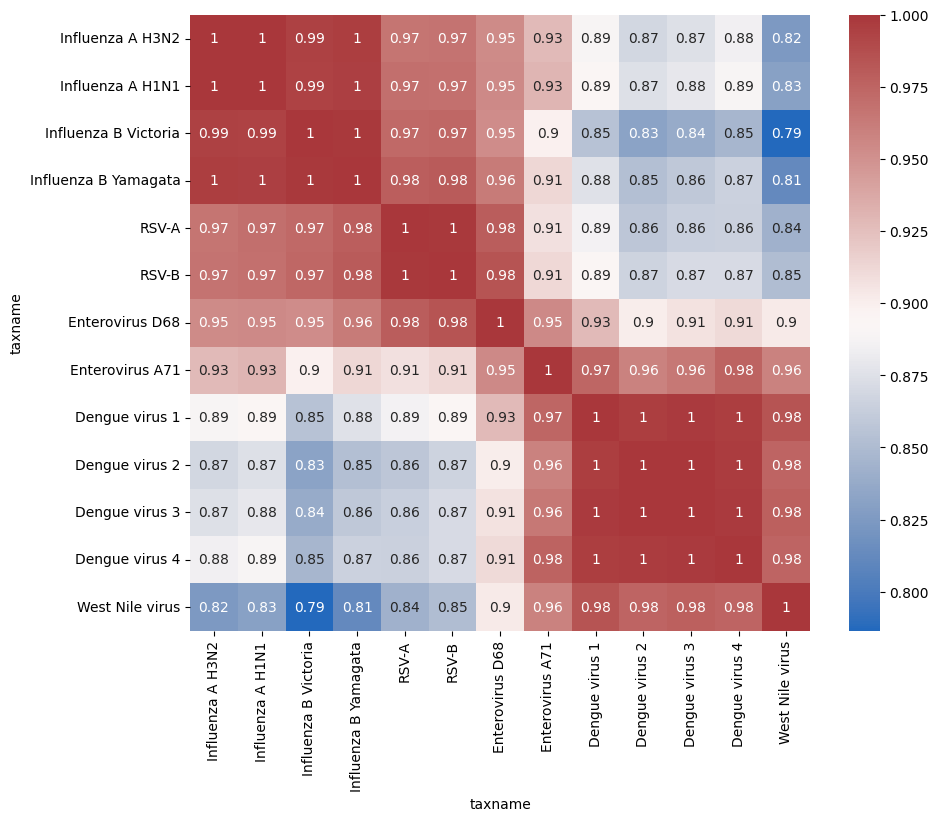

In [35]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

cs = pdist(dfms12Bloom_etal.set_index(['taxname']).iloc[:, :12], 'cosine')
cs_matrix = pd.DataFrame(1-squareform(cs), index=dfms12Bloom_etal['taxname'], columns=dfms12Bloom_etal['taxname'])

plt.figure(figsize=(10,8))
sns.heatmap(cs_matrix, annot=True, cmap='vlag')

In [36]:
uses_virus = ['RSV-A']

In [37]:
dfms12Bloom_etal_crop = dfms12Bloom_etal.loc[dfms12Bloom_etal['taxname'].isin(uses_virus)]

In [38]:
sarc_cov2_Bloom_etal = pd.read_csv('../viral_spectra/data/Bloom_etal/rates_by_clade.csv')

In [39]:
sarc_cov2_Bloom_etal

,clade,mut_type,count,total_count,fraction,parent_nt,parent_nt_frac,rate
0,20A,AtoC,286,17202,0.016626,A,0.289620,0.057407
1,20A,AtoG,1617,17202,0.094001,A,0.289620,0.324570
2,20A,AtoT,515,17202,0.029938,A,0.289620,0.103370
3,20A,CtoA,339,17202,0.019707,C,0.137040,0.143810
4,20A,CtoG,130,17202,0.007557,C,0.137040,0.055147
...,...,...,...,...,...,...,...,...
163,22C,GtoC,108,18958,0.005697,G,0.065438,0.087056
164,22C,GtoT,1616,18958,0.085241,G,0.065438,1.302600
165,22C,TtoA,713,18958,0.037609,T,0.508390,0.073978
166,22C,TtoC,3528,18958,0.186100,T,0.508390,0.366050


In [40]:
clades = ['SARS-CoV-2 20A', 'SARS-CoV-2 22C']

In [41]:
sarc_cov2_Bloom_etal['mut_type'] = sarc_cov2_Bloom_etal['mut_type'].str.replace('to', '>')

In [42]:
sarc_cov2_Bloom_etal_12ms = sarc_cov2_Bloom_etal.pivot(index='clade', columns='mut_type', values='rate')
sarc_cov2_Bloom_etal_12ms = sarc_cov2_Bloom_etal_12ms.div(sarc_cov2_Bloom_etal_12ms.sum(axis=1), axis=0).reset_index()
sarc_cov2_Bloom_etal_12ms = sarc_cov2_Bloom_etal_12ms[['A>C','A>G','A>T','C>A','C>G','C>T','G>A','G>C','G>T','T>A','T>C','T>G','clade']]

In [43]:
sarc_cov2_Bloom_etal_12ms['clade'] = sarc_cov2_Bloom_etal_12ms['clade'].str.replace('2', 'SARS-CoV-2 2', 1)
sarc_cov2_Bloom_etal_12ms = sarc_cov2_Bloom_etal_12ms.rename(columns={'clade':'taxname'})
sarc_cov2_Bloom_etal_12ms['Type'] = '+'
sarc_cov2_Bloom_etal_12ms['df'] = 'Bloom_etal'
sarc_cov2_Bloom_etal_12ms

mut_type,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,taxname,Type,df
0,0.007791,0.044050,0.014029,0.019518,0.007484,0.409514,0.101614,0.016632,0.324148,0.008769,0.040320,0.006130,SARS-CoV-2 20A,+,Bloom_etal
1,0.005131,0.042639,0.013275,0.019660,0.005877,0.418876,0.092502,0.014458,0.331944,0.008506,0.040512,0.006620,SARS-CoV-2 20B,+,Bloom_etal
2,0.006214,0.047744,0.013338,0.023317,0.002888,0.413176,0.106723,0.015085,0.314986,0.009729,0.040296,0.006505,SARS-CoV-2 20C,+,Bloom_etal
3,0.006447,0.051998,0.014070,0.021265,0.011825,0.456207,0.094713,0.010058,0.275128,0.009724,0.042270,0.006295,SARS-CoV-2 20E,+,Bloom_etal
4,0.005783,0.043577,0.015614,0.021408,0.002595,0.449000,0.107397,0.010755,0.288407,0.009493,0.039444,0.006529,SARS-CoV-2 20G,+,Bloom_etal
5,0.005582,0.046929,0.013735,0.022469,0.015971,0.440155,0.096955,0.011113,0.290972,0.009481,0.039914,0.006724,SARS-CoV-2 20I,+,Bloom_etal
6,0.006213,0.043568,0.015802,0.023384,0.004222,0.449165,0.103577,0.009913,0.285092,0.009881,0.041577,0.007607,SARS-CoV-2 21C,+,Bloom_etal
7,0.006933,0.055759,0.015515,0.027270,0.007494,0.380489,0.112353,0.015361,0.321436,0.007432,0.043113,0.006845,SARS-CoV-2 21I,+,Bloom_etal
8,0.007454,0.054675,0.015594,0.028669,0.011040,0.383043,0.109541,0.015074,0.315201,0.007430,0.046068,0.006212,SARS-CoV-2 21J,+,Bloom_etal
9,0.007512,0.058974,0.018271,0.031582,0.007690,0.475356,0.135544,0.013544,0.169225,0.016754,0.058418,0.007131,SARS-CoV-2 21K,+,Bloom_etal


In [44]:
sarc_cov2_20a22c_12ms = sarc_cov2_Bloom_etal_12ms[sarc_cov2_Bloom_etal_12ms['taxname'].isin(clades)].reset_index(drop=True)

In [56]:
viral_spectra_dataset = pd.concat([dfms12, dfms12Bloom_etal_crop, sarc_cov2_20a22c_12ms], ignore_index=True).fillna('-')
viral_spectra_dataset.loc[viral_spectra_dataset['df'] == 'nemu', 'taxid'] = \
    viral_spectra_dataset.loc[viral_spectra_dataset['df'] == 'nemu', 'taxid'].astype(int)

In [57]:
viral_spectra_dataset

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,-
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,-
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,-
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,11320,-
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,-
5,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,-
6,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,-
7,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162,-
8,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637,-
9,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,-


### add short virus names

In [59]:
name2short = {
    'Hepatitis B virus': 'HBV',
    'Rice black streaked dwarf virus': 'RBSDV',
    'West Nile virus': 'WNV',
    'Norwalk virus': 'norw',
    'Hepatovirus A': 'HAV',
    'Foot-and-mouth disease virus': 'FMDV',
    'Citrus tristeza virus': 'CTV',
    'Dengue virus': 'denv',
    'Porcine epidemic diarrhea virus': 'PEDV',
    'Porcine reproductive and respiratory syndrome virus': 'PRRSV',
    'Avian orthoreovirus': 'aorv',
    'Epizootic hemorrhagic disease virus': 'EHDV',
    'European bat 1 lyssavirus': 'EBLV1',
    'Banna virus': 'BAV',
    'Oropouche orthobunyavirus': 'OROV',
    'Enterovirus A': 'evA',
    'Enterovirus C': 'evC',
    'Enterovirus D': 'evD',
    'Human metapneumovirus': 'HMV',
    'Deformed wing virus': 'DWV',
    'Mammalian orthoreovirus': 'MRV',
    'Alphacoronavirus 1': 'alCoV1',
    'Avian coronavirus': 'ACoV ',
    'Schmallenberg orthobunyavirus': 'SBV',
    'Piscine orthoreovirus': 'PRV',
    'Orthohepevirus A': 'HEV',
    'Akabane orthobunyavirus': 'aka',
    'Hepacivirus hominis': 'HCV',
    'Puumala orthohantavirus': 'PUUV',
    'Rice stripe tenuivirus': 'RSV',
    'Influenza A H1N1': 'flu_h1n1pdm',
    'Influenza B Victoria': 'flu_vic',
    'Influenza A virus': 'flu_a',
    'RSV-A': 'rsv-a',
    'RSV-B': 'rsv-b',
    'SARS-CoV-2 20A': 'CoV20A',
    'SARS-CoV-2 22C': 'CoV22C',
    'Pegivirus C': 'HGV',
    'GB virus C': 'HGV',
}

In [69]:
viral_spectra_dataset['taxname'] = viral_spectra_dataset['taxname'].replace({'Pegivirus C': 'GB virus C'})
viral_spectra_dataset['virusname'] = viral_spectra_dataset['taxname'].map(name2short).fillna('-')
viral_spectra_dataset.to_csv('../viral_spectra/data/viral_spectra_dataset.csv', index=False, float_format='%g')
viral_spectra_dataset

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,11320,flu_a
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw
5,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,HAV
6,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,FMDV
7,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162,CTV
8,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637,denv
9,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,PEDV


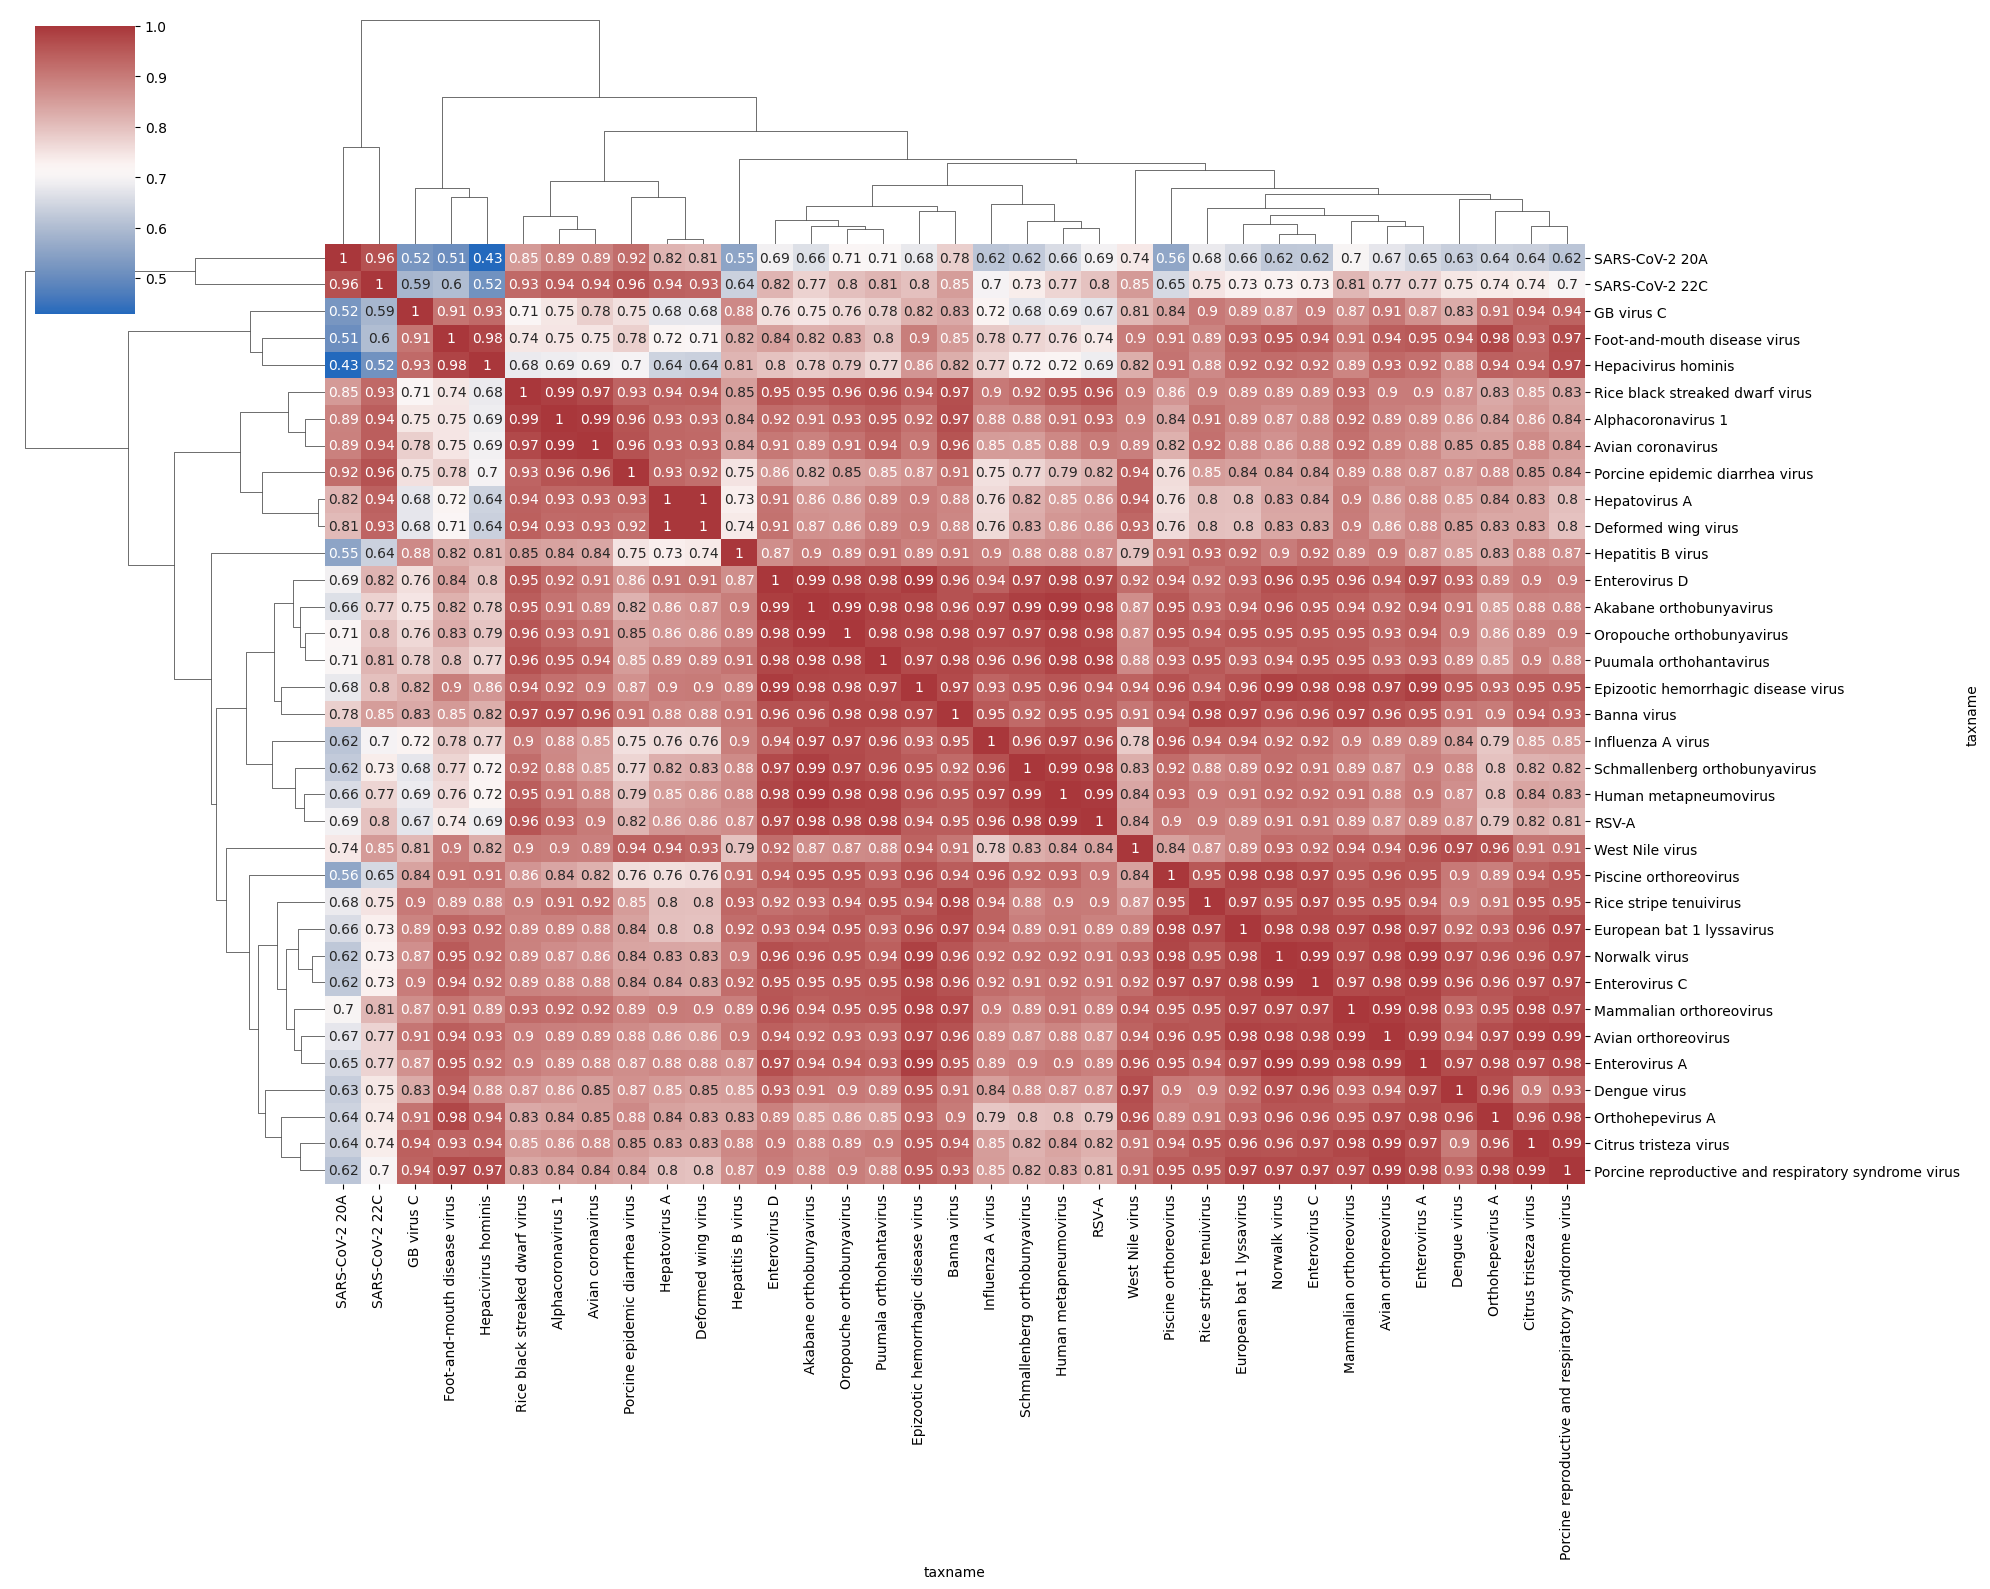

In [84]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

cs = pdist(viral_spectra_dataset.set_index(['taxname']).iloc[:, :12], 'cosine')
cs_matrix = pd.DataFrame(1-squareform(cs), index=viral_spectra_dataset['taxname'], columns=viral_spectra_dataset['taxname'])

sns.clustermap(cs_matrix, annot=True, cmap='vlag', figsize=(20,16))

In [80]:
# TODO merge with viral taxid info

In [72]:
# check intersection
vinfo = pd.read_csv('../viral_spectra/data/viral_taxid_info_be.csv')
a = vinfo[['taxid', 'species']].merge(viral_spectra_dataset, 'outer', on='taxid')
a[a['species'] != a['taxname']]

,taxid,species,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,virusname
32,-,NaN,0.007703,0.070279,0.038923,0.053017,0.002418,0.290197,0.334728,0.000332,0.040141,0.033842,0.120245,0.008174,-,RSV-A,Bloom_etal,rsv-a
33,-,NaN,0.007791,0.044050,0.014029,0.019518,0.007484,0.409514,0.101614,0.016632,0.324148,0.008769,0.040320,0.006130,+,SARS-CoV-2 20A,Bloom_etal,CoV20A
34,-,NaN,0.005280,0.061198,0.014484,0.029170,0.003536,0.474034,0.127443,0.013234,0.198024,0.011246,0.055648,0.006704,+,SARS-CoV-2 22C,Bloom_etal,CoV22C


In [79]:
a = viral_spectra_dataset.merge(vinfo, 'left', on='taxid')
a

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,...,phylum,kingdom,superkingdom,Nucleotide_Count,sequences,nucleotide_sites,ObsNum,TsTv,nsyn,n[syn+nonsyn]
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,...,NaN,NaN,NaN,NaN,NaN,NaN,3195.40270,1.474429,3195.403950,5579.296843
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,...,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,1149.0,123.0,4395.0,1194.65872,3.103985,1194.659448,1433.017526
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,...,Kitrinoviricota__2732406,Orthornavirae__2732396,Viruses__10239,23308.0,471.0,10302.0,2128.73703,7.341002,2128.737186,2597.432169
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,...,Negarnaviricota__2497569,Orthornavirae__2732396,Viruses__10239,1117536.0,446.0,2280.0,465.90789,4.079636,NaN,NaN
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,...,Pisuviricota__2732408,Orthornavirae__2732396,Viruses__10239,60009.0,101.0,5379.0,4630.55481,7.229637,4630.553624,4968.028902
5,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,...,NaN,NaN,NaN,NaN,NaN,NaN,7684.81080,5.784156,7684.808573,8440.681183
6,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,...,Pisuviricota__2732408,Orthornavirae__2732396,Viruses__10239,15462.0,458.0,7000.0,7756.65190,7.470198,7756.640326,9806.497226
7,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,...,Kitrinoviricota__2732406,Orthornavirae__2732396,Viruses__10239,7456.0,60.0,9410.0,2522.40030,3.440749,2522.399633,3786.073179
8,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,...,Kitrinoviricota__2732406,Orthornavirae__2732396,Viruses__10239,50000.0,493.0,10182.0,3810.87661,6.878358,3810.874084,4583.002514
9,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,...,Pisuviricota__2732408,Orthornavirae__2732396,Viruses__10239,7926.0,353.0,7967.0,2879.15450,2.309837,2879.163108,3751.443126
